In [3]:
%reload_ext autoreload
%autoreload 2

In [42]:
import sys
import matplotlib.pyplot as plt
%matplotlib inline

import torch.utils.data

sys.path.append('..')
from utils.audio import AudioProcessor
from dataset import TTSDataset, preprocess_ljspeech

In [7]:
ap = AudioProcessor()

AudioProcessor
  sample_rate:22050
  num_mels:80
  num_freq:1025
  frame_length_ms:50
  frame_shift_ms:12.5
  preemphasis:0.98
  min_level_db:-100
  ref_level_db:20
  power:1.5
  mel_fmin:0.0
  mel_fmax:8000.0
  griffin_lim_iters:60
  n_fft:2048
  hop_length:275
  win_length:1100


In [61]:
root_path = '../data/LJSpeech-1.1/'
meta_file = 'metadata.csv'
items = preprocess_ljspeech(root_path, meta_file)

In [62]:
len(items)

13100

In [63]:
items[0]

['Printing, in the only sense with which we are at present concerned, differs from most if not from all the arts and crafts represented in the Exhibition',
 '../data/LJSpeech-1.1/wavs/LJ001-0001.wav']

In [64]:
dataset = TTSDataset(7, 'phoneme_cleaners', ap, items, phoneme_cache_path='ljspeech_phonemes')

DataLoader initialization
  Use phonemes: True
  Number of instances: 13100


In [65]:
len(dataset)

13100

In [66]:
sample = dataset[0]
sample.keys()

dict_keys(['text', 'wav', 'item_idx'])

In [67]:
sample['text']

array([ 17,  77,  63,  15,  21,  63,  33, 122, 128,  63,  15,  30,  63,
       128,  16,  89,  15,  13,  10, 128,  20,  50,  15,  20, 128,  24,
        63,  30, 128,  24,  63,  21,  85, 128,  24,  10, 110, 128,  40,
       110,  77, 128,  28,  21, 128,  17,  77,  50,  27,  48,  15,  21,
       128,  12,  48,  15,  20,  51, 110,  15,   6, 122, 128,   6,  63,
         8,  49,  27, 128,   8,  77,  91,  14, 128,  14,  16,  89,  20,
        21, 128,  63,   8, 128,  15,  40, 110,  21, 128,   8,  77,  91,
        14, 128,  43, 110,  13, 128,  30,  63, 128,  40, 110,  77,  21,
        20, 128,  28,  15,   6, 128,  12,  77,  28,   8,  21,  20, 128,
        77,  50,  17,  77,  63,  27,  50,  15,  21, 116,   6, 128,  63,
        15,  30,  63, 128,  50,  12,  20,  63,   4,  63,  85,  48,  15],
      dtype=int32)

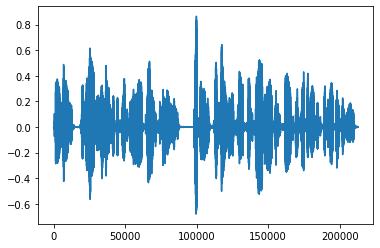

In [68]:
plt.plot(sample['wav'])

In [69]:
sample['item_idx']

'../data/LJSpeech-1.1/wavs/LJ001-0001.wav'

In [99]:
loader = torch.utils.data.DataLoader(dataset,
                                     batch_size=32,
                                     shuffle=False,
                                     collate_fn=dataset.collate_fn,
                                     drop_last=False,
                                     num_workers=0,
                                     pin_memory=False)

In [101]:
batch = iter(loader).next()

In [104]:
text, text_lengths, linear, mel, mel_lengths, stop_targets, item_idxs = batch

In [105]:
text.shape

torch.Size([32, 152])

In [108]:
print(text_lengths.shape)
print(text_lengths)

torch.Size([32])
tensor([152, 148, 143, 143, 133, 132, 131, 130, 129, 122, 119, 115, 111, 110,
        104, 102, 102, 101, 100,  99,  94,  78,  78,  72,  71,  69,  67,  66,
         58,  40,  29,  20])


In [111]:
linear.shape  # (batch, seq_len, input_size)

torch.Size([32, 805, 1025])

In [113]:
mel.shape

torch.Size([32, 805, 80])

- melはr=7で割り切れるようにpaddingした状態のサイズ
- 一方でmel_lengthsはpaddingする前のサイズ

In [115]:
print(mel_lengths.shape)
print(mel_lengths)

torch.Size([32])
tensor([799, 742, 777, 776, 631, 775, 652, 674, 679, 692, 564, 631, 709, 602,
        712, 569, 607, 662, 516, 567, 556, 490, 414, 424, 457, 428, 363, 477,
        376, 209, 154, 145])


In [116]:
stop_targets.shape

torch.Size([32, 805])